In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
dataset=pd.read_excel('Data AI4CKD.xlsx')

In [ ]:
dataset.shape

(309, 201)

In [ ]:
dataset.describe(include='all')

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
count,307,299,300.000000,304,268,252,191,307.000000,307.000000,307.000000,...,307.000000,11.000000,307.000000,11,307.000000,236,246,307,307.000000,307.000000
unique,307,3,NaN,3,9,10,4,NaN,NaN,NaN,...,NaN,NaN,NaN,9,NaN,3,3,7,NaN,NaN
top,NB.VIDE > 50%,M,NaN,Béninoise,Retriaité(e),Littoral,Marié(e),NaN,NaN,NaN,...,NaN,NaN,NaN,Décollement rétinienne,NaN,Oui,Non,CKD 5,NaN,NaN
freq,1,150,NaN,302,58,102,173,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,223,195,60,NaN,NaN
mean,NaN,NaN,54.503410,NaN,NaN,NaN,NaN,0.107492,0.664495,0.048860,...,0.032573,0.997029,0.035831,NaN,0.804560,NaN,NaN,NaN,0.592834,0.270358
std,NaN,NaN,15.344702,NaN,NaN,NaN,NaN,0.310243,0.472938,0.215927,...,0.177807,0.009853,0.186171,NaN,0.397186,NaN,NaN,NaN,0.492108,0.444870
min,NaN,NaN,0.022876,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.967320,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,0.000000
75%,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000


## Supression des colonnes ayant au moins 50% de valeurs nulles


In [ ]:
threshold = len(dataset) * 0.5
dataset = dataset.dropna(thresh=threshold, axis=1)

In [ ]:
dataset.drop(index=308, columns=["ID", "Nationalité"], inplace=True)

<ipython-input-8-578cb00fdc29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(index=308, columns=["ID", "Nationalité"], inplace=True)


In [ ]:
dataset.shape

(308, 142)

## Analyse et traitement sur la variable cible


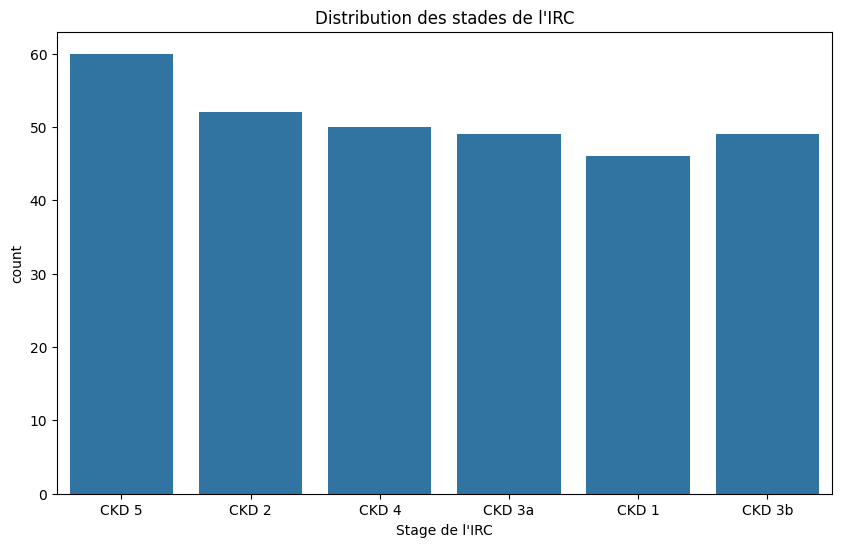

Stage de l'IRC
CKD 5     60
CKD 2     52
CKD 4     50
CKD 3a    49
CKD 3b    49
CKD 1     46
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Stage de l\'IRC', data=dataset)
plt.title('Distribution des stades de l\'IRC')
plt.show()

print(dataset['Stage de l\'IRC'].value_counts())

In [ ]:
dataset.columns.to_list()

['Sexe',
 'Age',
 'Profession (selon catégorie professionnelle)',
 'Adresse (Département)',
 'Situation Matrimoniale',
 "Motif(s) d'Admission/Asthénie",
 "Motif(s) d'Admission/Altération de la fonction rénale",
 "Motif(s) d'Admission/HTA",
 "Motif(s) d'Admission/Œdème",
 "Motif(s) d'Admission/Diabète",
 "Motif(s) d'Admission/Douleur abdominale",
 'Personnels Médicaux/HTA',
 'Personnels Médicaux/Diabète 1',
 'Personnels Médicaux/Diabète 2',
 'Personnels Médicaux/IRC',
 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',
 'Personnels Médicaux/Ulcère',
 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
 'Durée HTA (mois)',
 'Personnels Chirurgicaux/Appendicectomie',
 'Personnels Chirurgicaux/Césarienne',
 'Personnels Chirurgicaux/Hystérectomie',
 'Personnels Familiaux/HTA',
 'Personnels Familiaux/Diabète',
 'Enquête Sociale/Tabac',
 'Enquête Sociale/AlNS (+)',
 'Enquête Sociale/Alcool',
 'Enquête Sociale/Phytothérapie traditionnelle',
 'Enquête Sociale

In [ ]:
# ENcodage de la variable cible
ordre_stades = ["CKD 1", "CKD 2", "CKD 3a", "CKD 3b", "CKD 4", "CKD 5"]
dataset['Stage de l\'IRC'] = dataset['Stage de l\'IRC'].astype("category").cat.set_categories(ordre_stades, ordered=True).cat.codes
dataset = dataset[dataset['Stage de l\'IRC'] != -1]

## Traitement des variables binomiales

In [ ]:
binomial_columns = [col for col in dataset.columns if dataset[col].dropna().nunique() == 2]
len(binomial_columns)

106

In [ ]:
data_bino = dataset[binomial_columns]
data_bino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Columns: 106 entries, Sexe to Causes Majeure après Diagnostic/Diabète
dtypes: float64(60), object(46)
memory usage: 255.8+ KB


On voit que dans les données, certaines sont sur le format objet, nous allons donc les convertir

In [ ]:
object_bino = data_bino.select_dtypes(include=['object']).columns.tolist()
object_bino

['Sexe',
 'Symptômes/OMI',
 'Etat Général (EG)/Muqueuse Bulbaire',
 'Sueur',
 'Amplification Thoracique',
 'Sonorité Pulmonaire',
 'Murmure Vésiculaire',
 'B1 et B2/Réguliers',
 'B1 et B2/Perçu sans souffle',
 'Choc de Pointe/Perçu',
 'Pouls Périphériques/Régulier',
 'Présence de bruits surajoutés',
 'TSJ (Signe de Hazer)',
 'RHJ',
 'Mollets souples',
 'OMI/Siégeant au niveau des pieds',
 'OMI/Bilatéral',
 'OMI/Indolores',
 'OMI/Mous',
 'OMI/Douloureux',
 'Abdomen/Souple',
 'Abdomen/Balloné (et infiltré)',
 'Abdomen/Douloureux',
 'Douleur Epigastrique',
 'Douleur Hypogastrique',
 "Douleur à l'hypochondre",
 'Abdomen/Participe bien à la respiration',
 'Matité des flancs',
 'Hépatomégalie (augmentation du foi)',
 'Points Urétéraux douloureux',
 'Fosse Lombaire/Symétrique',
 'Fosse Lombaire/Douloureux',
 'Présence de Masse Lombaire',
 'Signe de Giordano',
 'Miction (Incontinence Urinaire)/Vue',
 'Miction (Incontinence Urinaire)/Confortable',
 'Miction (Incontinence Urinaire)/Normale',
 'B

In [ ]:
for col in object_bino:
    print(f"\n{col} → valeurs uniques :")
    print(data_bino[col].astype(str).str.lower().str.strip().unique())


Sexe → valeurs uniques :
['f' 'm' 'nan']

Symptômes/OMI → valeurs uniques :
['non' 'oui']

Etat Général (EG)/Muqueuse Bulbaire → valeurs uniques :
['anictérique' 'ictérique']

Sueur → valeurs uniques :
['non' 'oui']

Amplification Thoracique → valeurs uniques :
['bonne' 'nan' 'mauvaise']

Sonorité Pulmonaire → valeurs uniques :
['bonne' 'nan' 'matité']

Murmure Vésiculaire → valeurs uniques :
['bien perçu' 'aboli' 'nan']

B1 et B2/Réguliers → valeurs uniques :
['oui' 'nan' 'non']

B1 et B2/Perçu sans souffle → valeurs uniques :
['oui' 'nan' 'non']

Choc de Pointe/Perçu → valeurs uniques :
['nan' 'non' 'oui']

Pouls Périphériques/Régulier → valeurs uniques :
['oui' 'nan' 'non']

Présence de bruits surajoutés → valeurs uniques :
['non' 'oui']

TSJ (Signe de Hazer) → valeurs uniques :
['non' 'oui']

RHJ → valeurs uniques :
['non' 'oui']

Mollets souples → valeurs uniques :
['oui' 'non']

OMI/Siégeant au niveau des pieds → valeurs uniques :
['non' 'oui']

OMI/Bilatéral → valeurs uniques :

In [ ]:
for col in object_bino:
  data_bino[col] = data_bino[col].astype(str).str.lower().str.strip()

<ipython-input-17-0bae8188a04a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col] = data_bino[col].astype(str).str.lower().str.strip()
<ipython-input-17-0bae8188a04a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col] = data_bino[col].astype(str).str.lower().str.strip()
<ipython-input-17-0bae8188a04a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
mapping = {
    'oui': 1, 'non': 0,
    'vrai': 1, 'faux': 0,
    'm': 1, 'f': 0,
    'bonne': 1, 'mauvaise': 0,
    'présent': 1, 'absent': 0,
    'bien perçu': 1, 'aboli': 0,
    'conservée': 1, 'perte': 0,
    'anictérique': 1, 'ictérique': 0,
    'normal': 1, 'anormal': 0
}

for col in object_bino:
    data_bino[col] = data_bino[col].map(mapping)

<ipython-input-18-7678a87a1839>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col] = data_bino[col].map(mapping)
<ipython-input-18-7678a87a1839>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col] = data_bino[col].map(mapping)
<ipython-input-18-7678a87a1839>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
data_bino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Columns: 106 entries, Sexe to Causes Majeure après Diagnostic/Diabète
dtypes: float64(80), int64(26)
memory usage: 255.8 KB


In [ ]:
for col in object_bino:
    n_missing = data_bino[col].isna().sum()
    if n_missing > 0:
        print(f"{col} → {n_missing} valeurs non mappées")

Sexe → 8 valeurs non mappées
Amplification Thoracique → 7 valeurs non mappées
Sonorité Pulmonaire → 22 valeurs non mappées
Murmure Vésiculaire → 7 valeurs non mappées
B1 et B2/Réguliers → 12 valeurs non mappées
B1 et B2/Perçu sans souffle → 19 valeurs non mappées
Choc de Pointe/Perçu → 42 valeurs non mappées
Pouls Périphériques/Régulier → 47 valeurs non mappées
Abdomen/Souple → 15 valeurs non mappées
Abdomen/Douloureux → 10 valeurs non mappées
Abdomen/Participe bien à la respiration → 1 valeurs non mappées
Points Urétéraux douloureux → 1 valeurs non mappées
Miction (Incontinence Urinaire)/Vue → 4 valeurs non mappées
Miction (Incontinence Urinaire)/Confortable → 3 valeurs non mappées
Miction (Incontinence Urinaire)/Normale → 3 valeurs non mappées
Sensibilité → 11 valeurs non mappées
Convulsions → 1 valeurs non mappées
Anémie → 73 valeurs non mappées
Rythme Cardiaque/Régulier → 71 valeurs non mappées
Trouble de la Repolarisation → 61 valeurs non mappées


In [ ]:
(data_bino.isna().mean() * 100).sort_values(ascending=False)

,0
Anémie,23.856209
Rythme Cardiaque/Régulier,23.202614
Trouble de la Repolarisation,19.934641
Pouls Périphériques/Régulier,15.359477
Choc de Pointe/Perçu,13.725490
...,...
Pathologies/Rétinopathie diabétique,0.000000
Rythme Cardiaque/Sinusal,0.000000
Pathologies/Glaucome,0.000000
Causes Majeure après Diagnostic/HTA,0.000000


In [ ]:
missing_percent = data_bino.isnull().mean() * 100
cols_to_fill = missing_percent[missing_percent < 10].index

for col in cols_to_fill:
    data_bino[col].fillna(data_bino[col].mode()[0], inplace=True)

<ipython-input-22-eb2fae196bd2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_bino[col].fillna(data_bino[col].mode()[0], inplace=True)
<ipython-input-22-eb2fae196bd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col].fillna(data_bino[col].mode()[0], inplace=True)
<ipython-input-22-eb2fae196bd2>:5: FutureWarning: A value i

In [ ]:
missing_info = (data_bino.isna().mean() * 100).sort_values(ascending=False)
missing_info[missing_info > 10]

,0
Anémie,23.856209
Rythme Cardiaque/Régulier,23.202614
Trouble de la Repolarisation,19.934641
Pouls Périphériques/Régulier,15.359477
Choc de Pointe/Perçu,13.725490


In [ ]:
col_to_map = [
    "Anémie",
    "Rythme Cardiaque/Régulier",
    "Trouble de la Repolarisation",
    "Pouls Périphériques/Régulier",
    "Choc de Pointe/Perçu"
]

In [ ]:
from scipy.stats import pointbiserialr

for col in col_to_map:
    corr, pval = pointbiserialr(data_bino[col].fillna(0), dataset['Stage de l\'IRC'])
    print(f"{col} - Corrélation: {corr:.2f}, p-value: {pval:.20f}")

Anémie - Corrélation: 0.47, p-value: 0.00000000000000000527
Rythme Cardiaque/Régulier - Corrélation: -0.26, p-value: 0.00000450084070856433
Trouble de la Repolarisation - Corrélation: 0.16, p-value: 0.00577791165366767657
Pouls Périphériques/Régulier - Corrélation: -0.40, p-value: 0.00000000000031132279
Choc de Pointe/Perçu - Corrélation: -0.43, p-value: 0.00000000000000187855


In [ ]:
for col in col_to_map:
    print(f"\n--- {col} ---")
    print(data_bino[col].value_counts(dropna=False, normalize=True) * 100)



--- Anémie ---
Anémie
0.0    42.483660
1.0    33.660131
NaN    23.856209
Name: proportion, dtype: float64

--- Rythme Cardiaque/Régulier ---
Rythme Cardiaque/Régulier
1.0    72.875817
NaN    23.202614
0.0     3.921569
Name: proportion, dtype: float64

--- Trouble de la Repolarisation ---
Trouble de la Repolarisation
0.0    63.725490
NaN    19.934641
1.0    16.339869
Name: proportion, dtype: float64

--- Pouls Périphériques/Régulier ---
Pouls Périphériques/Régulier
1.0    83.006536
NaN    15.359477
0.0     1.633987
Name: proportion, dtype: float64

--- Choc de Pointe/Perçu ---
Choc de Pointe/Perçu
1.0    74.836601
NaN    13.725490
0.0    11.437908
Name: proportion, dtype: float64


In [ ]:
for col in col_to_map:
    data_bino[col] = data_bino[col].fillna(2)

<ipython-input-27-94b40ac7e06e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bino[col] = data_bino[col].fillna(2)


In [ ]:
for col in col_to_map:
    print(f"\n--- {col} ---")
    print(data_bino[col].value_counts(dropna=False, normalize=True) * 100)


--- Anémie ---
Anémie
0.0    42.483660
1.0    33.660131
2.0    23.856209
Name: proportion, dtype: float64

--- Rythme Cardiaque/Régulier ---
Rythme Cardiaque/Régulier
1.0    72.875817
2.0    23.202614
0.0     3.921569
Name: proportion, dtype: float64

--- Trouble de la Repolarisation ---
Trouble de la Repolarisation
0.0    63.725490
2.0    19.934641
1.0    16.339869
Name: proportion, dtype: float64

--- Pouls Périphériques/Régulier ---
Pouls Périphériques/Régulier
1.0    83.006536
2.0    15.359477
0.0     1.633987
Name: proportion, dtype: float64

--- Choc de Pointe/Perçu ---
Choc de Pointe/Perçu
1.0    74.836601
2.0    13.725490
0.0    11.437908
Name: proportion, dtype: float64


In [ ]:
dataset_final = data_bino.copy()
dataset_final["cible"] = dataset['Stage de l\'IRC']

In [ ]:
data_bino["Sexe"].unique()

array([0., 1.])

In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Columns: 107 entries, Sexe to cible
dtypes: float64(80), int64(26), int8(1)
memory usage: 256.1 KB


## Traitement des variables catégorielles

In [ ]:
# Colonnes catégorielles dans le dataset
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Exclure les colonnes binaires déjà traitées
non_bino_categorical_cols = [col for col in categorical_cols if col not in object_bino]

# Extraire ces colonnes du dataset
categorical_data = dataset[non_bino_categorical_cols]

In [ ]:
non_bino_categorical_cols

['Profession (selon catégorie professionnelle)',
 'Adresse (Département)',
 'Situation Matrimoniale',
 'Durée HTA (mois)',
 'Début des symptômes (mois)',
 'Automédication ?',
 "Etat Général (EG) à l'Admission",
 'Etat Général (EG)/Muqueuse Palpébrale',
 'Diurèse',
 'Vibrations Vocales (VV)',
 'Hygiène buccodentaire',
 'Langue',
 'Contact Lombaire',
 'Ballotement Rénal',
 'Conscience',
 'Motricité',
 'Cholestérol Total',
 'Cholestérol HDL']

In [ ]:
for col in non_bino_categorical_cols:
    print(f"\n--- {col} ---")
    print(dataset[col].value_counts(dropna=False, normalize=True) * 100)


--- Profession (selon catégorie professionnelle) ---
Profession (selon catégorie professionnelle)
Retriaité(e)           18.954248
Salarié(e)             17.647059
Agent commercial       16.666667
Artisan                15.686275
NaN                    12.745098
Personnel sanitaire    10.130719
Entrepreneur            5.555556
Ecolier/Etudiant        1.633987
Religieux               0.980392
Name: proportion, dtype: float64

--- Adresse (Département) ---
Adresse (Département)
Littoral      33.333333
Atlantique    27.777778
NaN           17.973856
Ouémé         12.745098
Zou            2.614379
Mono           2.614379
Plateau        0.980392
Couffo         0.980392
Collines       0.653595
Alibori        0.326797
Name: proportion, dtype: float64

--- Situation Matrimoniale ---
Situation Matrimoniale
Marié(e)       56.535948
NaN            37.908497
Célibataire     5.228758
Veuf(ve)        0.326797
Name: proportion, dtype: float64

--- Durée HTA (mois) ---
Durée HTA (mois)
NaN         35

In [ ]:
(categorical_data.isna().mean() * 100).sort_values(ascending=False)

,0
Cholestérol HDL,46.732026
Cholestérol Total,45.751634
Début des symptômes (mois),42.483660
Situation Matrimoniale,37.908497
Durée HTA (mois),35.294118
Adresse (Département),17.973856
Profession (selon catégorie professionnelle),12.745098
Langue,5.882353
Hygiène buccodentaire,3.921569
Motricité,3.921569


In [ ]:
categorical_data['Début des symptômes (mois)'].unique()

array(['<=1', '>3', ']1;3]', nan], dtype=object)

### Variable nominale

In [ ]:
inf_10 = [
    "Langue",
    "Hygiène buccodentaire",
    "Motricité",
    "Conscience",
    "Vibrations Vocales (VV)",
    "Etat Général (EG) à l'Admission",
    "Contact Lombaire",
    "Ballotement Rénal",
    "Diurèse",
    "Automédication ?",
    "Etat Général (EG)/Muqueuse Palpébrale"
]

In [ ]:
for col in inf_10:
    categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

<ipython-input-37-1c1edfcf6fb6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)
<ipython-input-37-1c1edfcf6fb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)


In [ ]:
(categorical_data.isna().mean() * 100).sort_values(ascending=False)

,0
Cholestérol HDL,46.732026
Cholestérol Total,45.751634
Début des symptômes (mois),42.483660
Situation Matrimoniale,37.908497
Durée HTA (mois),35.294118
Adresse (Département),17.973856
Profession (selon catégorie professionnelle),12.745098
Etat Général (EG)/Muqueuse Palpébrale,0.000000
Etat Général (EG) à l'Admission,0.000000
Automédication ?,0.000000


In [ ]:
missing_pct = categorical_data.isna().mean()
cols_to_test = missing_pct[missing_pct > 0.10].index
cols_to_test

Index(['Profession (selon catégorie professionnelle)', 'Adresse (Département)',
       'Situation Matrimoniale', 'Durée HTA (mois)',
       'Début des symptômes (mois)', 'Cholestérol Total', 'Cholestérol HDL'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

for col in cols_to_test:
  contingency = pd.crosstab(categorical_data[col], dataset['Stage de l\'IRC'])
  chi2, pval, dof, expected = chi2_contingency(contingency)
  print(f"Variable : {col} | p-value : {pval:.4f}")

Variable : Profession (selon catégorie professionnelle) | p-value : 0.0641
Variable : Adresse (Département) | p-value : 0.0051
Variable : Situation Matrimoniale | p-value : 0.1280
Variable : Durée HTA (mois) | p-value : 0.6825
Variable : Début des symptômes (mois) | p-value : 0.0048
Variable : Cholestérol Total | p-value : 0.6833
Variable : Cholestérol HDL | p-value : 0.6287


In [ ]:
categorical_data["Début des symptômes (mois)"].unique()

array(['<=1', '>3', ']1;3]', nan], dtype=object)

In [ ]:
ordre_sympt = {
    '<=1': 0,
    ']1;3]': 1,
    '>3': 2,
    np.nan: -1
}

categorical_data["Début des symptômes (mois)"] = categorical_data["Début des symptômes (mois)"].map(ordre_sympt)

<ipython-input-42-7235c335ed85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Début des symptômes (mois)"] = categorical_data["Début des symptômes (mois)"].map(ordre_sympt)


In [ ]:
categorical_data["Début des symptômes (mois)"].unique()

array([ 0,  2,  1, -1])

In [ ]:
categorical_data["Adresse (Département)"].unique()

array(['Littoral', 'Zou', 'Atlantique', 'Plateau', nan, 'Mono', 'Ouémé',
       'Couffo', 'Alibori', 'Collines'], dtype=object)

In [ ]:
categorical_data['Adresse (Département)'] = categorical_data['Adresse (Département)'].replace({
    np.nan: 'Inconnu'
})

<ipython-input-45-a1b2a75dfd29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Adresse (Département)'] = categorical_data['Adresse (Département)'].replace({


In [ ]:
categorical_data["Profession (selon catégorie professionnelle)"].unique()

array(['Artisan', nan, 'Entrepreneur', 'Salarié(e) ', 'Agent commercial',
       'Retriaité(e) ', 'Personnel sanitaire', 'Ecolier/Etudiant',
       'Religieux'], dtype=object)

In [ ]:
categorical_data['Profession (selon catégorie professionnelle)'] = categorical_data['Profession (selon catégorie professionnelle)'].replace({
    np.nan: 'Inconnu'
})

<ipython-input-47-aa87bbb19053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Profession (selon catégorie professionnelle)'] = categorical_data['Profession (selon catégorie professionnelle)'].replace({


In [ ]:
categorical_data['Situation Matrimoniale'] = categorical_data['Situation Matrimoniale'].replace({
    np.nan: 'Inconnu'
})

<ipython-input-48-dc5c821e2e8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Situation Matrimoniale'] = categorical_data['Situation Matrimoniale'].replace({


In [ ]:
categorical_data["Durée HTA (mois)"].unique()

array(['>=120', nan, '[60;120[', '[6;12[', '<6', '[12;60['], dtype=object)

In [ ]:
ordre_month = {
    '<6': 0,
    '[6;12[': 1,
    '[12;60[': 2,
    '[60;120[': 3,
    '>=120': 4,
    np.nan: -1
}

categorical_data["Durée HTA (mois)"] = categorical_data["Durée HTA (mois)"].map(ordre_month)

<ipython-input-50-fe82f4f1a0d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Durée HTA (mois)"] = categorical_data["Durée HTA (mois)"].map(ordre_month)


In [ ]:
missing_pct = categorical_data.isna().mean()
cols_to_test = missing_pct[missing_pct > 0.10].index
cols_to_test

Index(['Cholestérol Total', 'Cholestérol HDL'], dtype='object')

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Encodage des autres variables catégorielles
for col in categorical_data:
    categorical_data[col] = label_encoder.fit_transform(categorical_data[col].astype(str))

<ipython-input-53-2700d76a3b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col].astype(str))
<ipython-input-53-2700d76a3b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col].astype(str))
<ipython-input-53-2700d76a3b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_data.columns.to_list():
  contingency = pd.crosstab(categorical_data[col], categorical_data["Cholestérol HDL"])
  chi2, pval, dof, expected = chi2_contingency(contingency)
  print(f"Variable : {col} | p-value : {pval:.4f}")

Variable : Profession (selon catégorie professionnelle) | p-value : 0.3078
Variable : Adresse (Département) | p-value : 0.7443
Variable : Situation Matrimoniale | p-value : 0.2742
Variable : Durée HTA (mois) | p-value : 0.0476
Variable : Début des symptômes (mois) | p-value : 0.7245
Variable : Automédication ? | p-value : 0.6763
Variable : Etat Général (EG) à l'Admission | p-value : 0.0007
Variable : Etat Général (EG)/Muqueuse Palpébrale | p-value : 0.0069
Variable : Diurèse | p-value : 0.4156
Variable : Vibrations Vocales (VV) | p-value : 0.7904
Variable : Hygiène buccodentaire | p-value : 0.0022
Variable : Langue | p-value : 0.9028
Variable : Contact Lombaire | p-value : 1.0000
Variable : Ballotement Rénal | p-value : 1.0000
Variable : Conscience | p-value : 0.9528
Variable : Motricité | p-value : 0.5429
Variable : Cholestérol Total | p-value : 0.0000
Variable : Cholestérol HDL | p-value : 0.0000


In [ ]:
from scipy.stats import chi2_contingency

for col in dataset_final.columns.to_list():
  contingency = pd.crosstab(dataset_final[col], categorical_data["Cholestérol HDL"])
  chi2, pval, dof, expected = chi2_contingency(contingency)
  print(f"Variable : {col} | p-value : {pval:.4f}")

Variable : Sexe | p-value : 0.2148
Variable : Motif(s) d'Admission/Asthénie | p-value : 0.1655
Variable : Motif(s) d'Admission/Altération de la fonction rénale | p-value : 0.2266
Variable : Motif(s) d'Admission/HTA | p-value : 0.6857
Variable : Motif(s) d'Admission/Œdème | p-value : 0.4568
Variable : Motif(s) d'Admission/Diabète | p-value : 0.6168
Variable : Motif(s) d'Admission/Douleur abdominale | p-value : 0.9473
Variable : Personnels Médicaux/HTA | p-value : 0.3625
Variable : Personnels Médicaux/Diabète 1 | p-value : 0.0880
Variable : Personnels Médicaux/Diabète 2 | p-value : 0.2050
Variable : Personnels Médicaux/IRC | p-value : 0.0052
Variable : Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie) | p-value : 0.5687
Variable : Personnels Médicaux/Ulcère | p-value : 0.7832
Variable : Personnels Médicaux/Pathologies virales (HB, HC, HIV) | p-value : 0.1196
Variable : Personnels Chirurgicaux/Appendicectomie | p-value : 0.6369
Variable : Personnels Chirurgica

In [ ]:
encoded_columns = categorical_data.columns.tolist()
encoded_columns

['Profession (selon catégorie professionnelle)',
 'Adresse (Département)',
 'Situation Matrimoniale',
 'Durée HTA (mois)',
 'Début des symptômes (mois)',
 'Automédication ?',
 "Etat Général (EG) à l'Admission",
 'Etat Général (EG)/Muqueuse Palpébrale',
 'Diurèse',
 'Vibrations Vocales (VV)',
 'Hygiène buccodentaire',
 'Langue',
 'Contact Lombaire',
 'Ballotement Rénal',
 'Conscience',
 'Motricité',
 'Cholestérol Total',
 'Cholestérol HDL']

In [ ]:
corr_to_hdl = [
    "Etat Général (EG) à l'Admission",
    "Etat Général (EG)/Muqueuse Palpébrale",
    "Hygiène buccodentaire",
]

_ = [
    "Personnels Médicaux/Diabète 1",
    "Enquête Sociale/Alcool",
    "Miction (Incontinence Urinaire)/Confortable",
    "Miction (Incontinence Urinaire)/Normale",
    "Globe vésical"
]

# Filtrer les colonnes dans chaque dataset
dataset_A_filtered = categorical_data[corr_to_hdl]
dataset_B_filtered = dataset_final[_]


combined_dataset = pd.concat([dataset_A_filtered, dataset_B_filtered], axis=0)
combined_dataset["Cholestérol HDL"] = categorical_data["Cholestérol HDL"]

In [ ]:
from sklearn.impute import KNNImputer

# Créer une copie du dataset
combined_dataset_imputed = combined_dataset.copy()

# Appliquer l'imputation sur toutes les colonnes, y compris 'Cholestérol HDL'
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(combined_dataset_imputed)

# Remettre les noms de colonnes dans le DataFrame
combined_dataset_imputed = pd.DataFrame(imputed_array, columns=combined_dataset.columns)

# Vérifier l'imputation
print(combined_dataset_imputed[["Cholestérol HDL"]].head())


   Cholestérol HDL
0              4.0
1              4.0
2              4.0
3              4.0
4              4.0


In [ ]:
categorical_data["Cholestérol HDL"] = combined_dataset_imputed["Cholestérol HDL"]

<ipython-input-59-4203c2fd008f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Cholestérol HDL"] = combined_dataset_imputed["Cholestérol HDL"]


In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_data.columns.to_list():
  contingency = pd.crosstab(categorical_data[col], categorical_data["Cholestérol Total"])
  chi2, pval, dof, expected = chi2_contingency(contingency)
  print(f"Variable : {col} | p-value : {pval:.4f}")

Variable : Profession (selon catégorie professionnelle) | p-value : 0.0292
Variable : Adresse (Département) | p-value : 0.2820
Variable : Situation Matrimoniale | p-value : 0.0679
Variable : Durée HTA (mois) | p-value : 0.0720
Variable : Début des symptômes (mois) | p-value : 0.1298
Variable : Automédication ? | p-value : 0.3272
Variable : Etat Général (EG) à l'Admission | p-value : 0.0010
Variable : Etat Général (EG)/Muqueuse Palpébrale | p-value : 0.1057
Variable : Diurèse | p-value : 0.7247
Variable : Vibrations Vocales (VV) | p-value : 0.4206
Variable : Hygiène buccodentaire | p-value : 0.0000
Variable : Langue | p-value : 0.7316
Variable : Contact Lombaire | p-value : 1.0000
Variable : Ballotement Rénal | p-value : 1.0000
Variable : Conscience | p-value : 0.4077
Variable : Motricité | p-value : 0.8489
Variable : Cholestérol Total | p-value : 0.0000
Variable : Cholestérol HDL | p-value : 0.0000


In [ ]:
from scipy.stats import chi2_contingency

for col in dataset_final.columns.to_list():
  contingency = pd.crosstab(dataset_final[col], categorical_data["Cholestérol Total"])
  chi2, pval, dof, expected = chi2_contingency(contingency)
  print(f"Variable : {col} | p-value : {pval:.4f}")

Variable : Sexe | p-value : 0.2721
Variable : Motif(s) d'Admission/Asthénie | p-value : 0.1612
Variable : Motif(s) d'Admission/Altération de la fonction rénale | p-value : 0.4123
Variable : Motif(s) d'Admission/HTA | p-value : 0.5928
Variable : Motif(s) d'Admission/Œdème | p-value : 0.5645
Variable : Motif(s) d'Admission/Diabète | p-value : 0.7832
Variable : Motif(s) d'Admission/Douleur abdominale | p-value : 0.7678
Variable : Personnels Médicaux/HTA | p-value : 0.3247
Variable : Personnels Médicaux/Diabète 1 | p-value : 0.3326
Variable : Personnels Médicaux/Diabète 2 | p-value : 0.1437
Variable : Personnels Médicaux/IRC | p-value : 0.0021
Variable : Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie) | p-value : 0.8036
Variable : Personnels Médicaux/Ulcère | p-value : 0.6364
Variable : Personnels Médicaux/Pathologies virales (HB, HC, HIV) | p-value : 0.1867
Variable : Personnels Chirurgicaux/Appendicectomie | p-value : 0.8224
Variable : Personnels Chirurgica

In [ ]:
__ = [
    "Début des symptômes (mois)",
    "Hygiène buccodentaire"
]

_1 = [
    "Enquête Sociale/Alcool",
    "Evolution de l'Etat Générale/Favorable",
    "Rythme Cardiaque/Sinusal"
]

# Filtrer les colonnes dans chaque dataset
dataset_A_filtered = categorical_data[__]
dataset_B_filtered = dataset_final[_1]


combined_dataset = pd.concat([dataset_A_filtered, dataset_B_filtered], axis=0)
combined_dataset["Cholestérol Total"] = categorical_data["Cholestérol Total"]

In [ ]:
non_numeric_cols = combined_dataset_imputed.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index([], dtype='object')


In [ ]:
combined_dataset["Cholestérol Total"].unique()

array([3, 2, 0, 1])

In [ ]:
from sklearn.impute import KNNImputer

# Créer une copie du dataset
combined_dataset_imputed = combined_dataset.copy()

# Appliquer l'imputation sur toutes les colonnes, y compris 'Cholestérol HDL'
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(combined_dataset_imputed)

# Remettre les noms de colonnes dans le DataFrame
combined_dataset_imputed = pd.DataFrame(imputed_array, columns=combined_dataset.columns)

# Vérifier l'imputation
print(combined_dataset_imputed[["Cholestérol Total"]].head())


   Cholestérol Total
0                3.0
1                3.0
2                3.0
3                3.0
4                3.0


In [ ]:
missing_percent = categorical_data.isnull().mean() * 100
cols_to_fill = missing_percent[missing_percent < 10].index

for col in cols_to_fill:
    categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

<ipython-input-66-54556ae3d06b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)
<ipython-input-66-54556ae3d06b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)
<ipython-input-66-54556ae3d06b>

In [ ]:
missing_info = (categorical_data.isna().mean() * 100).sort_values(ascending=False)
missing_info[missing_info > 10]

,0


In [ ]:
dataset_final = pd.concat([dataset_final, categorical_data], axis=1)

In [ ]:
dataset_final["cible"].unique()

array([5, 1, 4, 2, 0, 3], dtype=int8)

## Traitement des variables numériques

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from collections import Counter

# Identifier les colonnes binaires et numériques
def get_binary_and_numeric_columns(data):
    # Variables numériques : celles ayant des valeurs continues ou discrètes
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

    # Variables binaires : celles ayant seulement 2 valeurs uniques
    binary_cols = [col for col in numeric_cols if data[col].nunique() == 2]

    # Variables numériques : celles qui ne sont pas binaires
    numeric_cols = [col for col in numeric_cols if col not in binary_cols]

    return binary_cols, numeric_cols

# Traitement des colonnes binaires
def process_binary_columns(data, binary_cols):
    for col in binary_cols:
        data[col] = data[col].fillna(data[col].mode()[0])  # Remplir les NaN par la valeur la plus fréquente
    return data

# Traitement des colonnes numériques
def process_numerical_columns(data, numeric_cols):
    # Imputation des valeurs manquantes pour les colonnes numériques spécifiques
    for col in ['Age', 'Créatinine (mg/L)']:  # Exemple de colonnes à traiter spécifiquement
        data[col] = data[col].fillna(data[col].median())  # Remplir par la médiane

    # Normalisation des colonnes numériques
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    # Imputation des valeurs manquantes avec KNN sur les colonnes numériques
    imputer = KNNImputer(n_neighbors=5)
    data_imputed = imputer.fit_transform(data[numeric_cols])

    # Remplacer les valeurs imputées par les données originales après inverse transformation
    data[numeric_cols] = scaler.inverse_transform(data_imputed)
    return data



In [ ]:
# Identifier les variables binaires et numériques dans le dataset
binary_cols, numeric_cols = get_binary_and_numeric_columns(dataset)

# Afficher les colonnes binaires et numériques
print("Colonnes binaires :")
print(binary_cols)

print("\nColonnes numériques :")
print(numeric_cols)

Colonnes binaires :
["Motif(s) d'Admission/Asthénie", "Motif(s) d'Admission/Altération de la fonction rénale", "Motif(s) d'Admission/HTA", "Motif(s) d'Admission/Œdème", "Motif(s) d'Admission/Diabète", "Motif(s) d'Admission/Douleur abdominale", 'Personnels Médicaux/HTA', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Médicaux/IRC', 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)', 'Personnels Médicaux/Ulcère', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Personnels Chirurgicaux/Appendicectomie', 'Personnels Chirurgicaux/Césarienne', 'Personnels Chirurgicaux/Hystérectomie', 'Personnels Familiaux/HTA', 'Personnels Familiaux/Diabète', 'Enquête Sociale/Tabac', 'Enquête Sociale/AlNS (+)', 'Enquête Sociale/Alcool', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/Epice', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', 'Symptômes/Fièvre', 'Symptômes/Frissons', 'Symptômes/Céphalées', 'Symptômes/Dou

In [ ]:
numeric_cols = dataset.select_dtypes(include=['number'])

# Seuil minimal de diversité des valeurs (ici 5)
threshold = 2

# Garder les colonnes numériques qui ont plus de 5 valeurs uniques
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > threshold]

numeric_cols.columns.to_list()

['Age',
 'TA (mmHg)/Systole',
 'TA (mmHg)/Diastole',
 'Poul (bpm)',
 'Poids (Kg)',
 'Score de Glasgow (/15)',
 'Glycémie à jeun (taux de Glucose)',
 'Urée (g/L)',
 'Créatinine (mg/L)',
 'Na^+ (meq/L)',
 'K^+ (meq/L)',
 'Ca^2+ (meq/L)',
 'Cl^- (meq/L)',
 'Hb (g/dL)',
 'VGM (fL)',
 'NB (G/L)',
 'Plaquettes (g/L)',
 "Stage de l'IRC"]

In [ ]:
for col in numeric_cols.columns.to_list():
  missing_values = numeric_cols[col].isna().sum()
  print(f"{col} : {missing_values}")

Age : 7
TA (mmHg)/Systole : 61
TA (mmHg)/Diastole : 61
Poul (bpm) : 69
Poids (Kg) : 126
Score de Glasgow (/15) : 31
Glycémie à jeun (taux de Glucose) : 87
Urée (g/L) : 23
Créatinine (mg/L) : 0
Na^+ (meq/L) : 35
K^+ (meq/L) : 30
Ca^2+ (meq/L) : 91
Cl^- (meq/L) : 49
Hb (g/dL) : 50
VGM (fL) : 135
NB (G/L) : 128
Plaquettes (g/L) : 110
Stage de l'IRC : 0


In [ ]:
# Remplacer les valeurs manquantes par la médiane au niveau des colonnes age et creatinine vu qu'ils ont un pourcentage de valeurs manquantes réduit
numeric_cols['Age'].fillna(numeric_cols['Age'].median(), inplace=True)
numeric_cols['Créatinine (mg/L)'].fillna(numeric_cols['Créatinine (mg/L)'].median(), inplace=True)

<ipython-input-74-47d4bae39e3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numeric_cols['Age'].fillna(numeric_cols['Age'].median(), inplace=True)
<ipython-input-74-47d4bae39e3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Liste des colonnes à imputer
colonnes_knn = [
    "TA (mmHg)/Systole",
    "TA (mmHg)/Diastole",
    "Poul (bpm)",
    "Score de Glasgow (/15)",
    "Glycémie à jeun (taux de Glucose)",
    "Urée (g/L)",
    "Na^+ (meq/L)",
    "K^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Cl^- (meq/L)",
    "Hb (g/dL)"
]

# Sauvegarder les index pour éviter les problèmes d'alignement après transformation
index_data = numeric_cols.index

# Standardiser les colonnes pour éviter que certaines valeurs dominent
scaler = StandardScaler()
data_standardized = scaler.fit_transform(numeric_cols[numeric_cols.columns.to_list()])

# Appliquer KNN Imputer (on prend 5 voisins par défaut, mais peut être ajusté)
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_standardized)

# Remettre les valeurs dans un DataFrame avec les noms de colonnes d'origine
numeric_cols[numeric_cols.columns.to_list()] = scaler.inverse_transform(data_imputed)

# Vérifier s'il reste des valeurs manquantes
numeric_cols[numeric_cols.columns.to_list()].isnull().sum()


,0
Age,0
TA (mmHg)/Systole,0
TA (mmHg)/Diastole,0
Poul (bpm),0
Poids (Kg),0
Score de Glasgow (/15),0
Glycémie à jeun (taux de Glucose),0
Urée (g/L),0
Créatinine (mg/L),0
Na^+ (meq/L),0


In [ ]:
# Calcul des quartiles et de l'IQR
Q1 = numeric_cols['Age'].quantile(0.25)
Q3 = numeric_cols['Age'].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils (1.5*IQR est la règle standard)
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR

# Valeurs aberrantes (hors seuils IQR)
outliers_age = numeric_cols[(numeric_cols['Age'] <(Q1 - 1.5 * IQR) )| (numeric_cols['Age'] > (Q3 + 1.5 * IQR))]

# Affichage des résultats
outliers_age

,Age,TA (mmHg)/Systole,TA (mmHg)/Diastole,Poul (bpm),Poids (Kg),Score de Glasgow (/15),Glycémie à jeun (taux de Glucose),Urée (g/L),Créatinine (mg/L),Na^+ (meq/L),K^+ (meq/L),Ca^2+ (meq/L),Cl^- (meq/L),Hb (g/dL),VGM (fL),NB (G/L),Plaquettes (g/L),Stage de l'IRC


In [ ]:
# Sélection des colonnes d'intérêt + stade IRC
colonnes_a_afficher = ["TA (mmHg)/Systole", "TA (mmHg)/Diastole", "Stage de l'IRC"]
colonnes_ta = ["TA (mmHg)/Systole", "TA (mmHg)/Diastole"]
def detecter_outliers(data, colonnes, return_mask=False):
    outliers_combined = pd.DataFrame()
    mask_combined = pd.Series(False, index=data.index)

    for col in colonnes:
        if data[col].dtype in ['int64', 'float64']:  # Vérifie si la colonne est numérique
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            seuil_bas = Q1 - 1.5 * IQR
            seuil_haut = Q3 + 1.5 * IQR

            outliers_mask = (data[col] < seuil_bas) | (data[col] > seuil_haut)
            mask_combined = mask_combined | outliers_mask

            outliers_col = data.loc[outliers_mask].copy()
            outliers_col['Variable'] = col  # Pour tracer l'origine de l'outlier
            outliers_combined = pd.concat([outliers_combined, outliers_col])

    outliers_combined = outliers_combined.drop_duplicates()

    if return_mask:
        return outliers_combined, mask_combined
    else:
        return outliers_combined


In [ ]:
outliers, mask = detecter_outliers(numeric_cols, colonnes_ta, return_mask=True)

In [ ]:
outliers[colonnes_a_afficher].shape

(49, 3)

In [ ]:
# Comprehensive clinical filter
def apply_clinical_filter(outliers_df):
    final_outliers = pd.DataFrame()
    print("\nApplying Clinical Filter to Outliers:")
    print("----------------------------------------")

    for idx, row in outliers_df.iterrows():
        systole = row['TA (mmHg)/Systole']
        diastole = row['TA (mmHg)/Diastole']
        stage = row['Stage de l\'IRC']
        pulse_pressure = systole - diastole  # Difference between systolic and diastolic

        anomaly_detected = False
        reason = ""

        # General rules for all stages
        if systole < 50 or diastole < 20:  # Physiologically impossible
            reason = "Implausibly low BP"
            anomaly_detected = True
        elif systole <= diastole:  # Systolic should be greater than diastolic
            reason = "Systolic <= Diastolic (inverted BP)"
            anomaly_detected = True
        elif systole > 300 or diastole > 150:  # Extremely high BP
            reason = "Extremely high BP"
            anomaly_detected = True
        elif pulse_pressure < 20:  # Too narrow pulse pressure
            reason = "Narrow pulse pressure (< 20 mmHg)"
            anomaly_detected = True
        elif pulse_pressure > 100 and diastole < 50:  # Wide pulse pressure with low diastolic
            reason = "Wide pulse pressure (> 100) with low diastolic"
            anomaly_detected = True

        # Stage-specific rules
        elif stage == "CKD 5" and (systole < 90 or diastole < 50):  # Hypotension rare in CKD 5
            reason = "Low BP for CKD 5 (expect hypertension)"
            anomaly_detected = True
        elif stage in ["CKD 3a", "CKD 3b"] and (systole < 80 or diastole < 40):  # Low BP unusual
            reason = f"Low BP for {stage}"
            anomaly_detected = True
        elif stage == "CKD 4" and (systole < 90 or diastole < 40):  # Low BP unusual
            reason = "Low BP for CKD 4"
            anomaly_detected = True
        elif stage == "CKD 2" and (systole < 70 or diastole < 40):  # Low BP rare
            reason = "Low BP for CKD 2"
            anomaly_detected = True
        elif stage == "CKD 1" and (systole < 70 or diastole < 40):  # Low BP rare in near-normal function
            reason = "Low BP for CKD 1"
            anomaly_detected = True
        elif stage == "CKD 0" and (systole < 70 or diastole < 40):  # Invalid stage, check low BP
            reason = "Low BP for CKD 0 (possible typo)"
            anomaly_detected = True

        if anomaly_detected:
            print(f"Index {idx}: Systole={systole}, Diastole={diastole}, Stage={stage} -> {reason}")
            final_outliers = pd.concat([final_outliers, pd.DataFrame([row])])

    if final_outliers.empty:
        print("No clinical anomalies detected.")
    else:
        print(f"\nFound {len(final_outliers)} clinical anomalies.")
    return final_outliers
final_outliers = apply_clinical_filter(outliers)




Applying Clinical Filter to Outliers:
----------------------------------------
Index 167: Systole=13.0, Diastole=5.0, Stage=1.0 -> Implausibly low BP
Index 178: Systole=16.0, Diastole=11.0, Stage=4.0 -> Implausibly low BP
Index 215: Systole=9.0, Diastole=4.0, Stage=4.0 -> Implausibly low BP
Index 224: Systole=12.0, Diastole=8.0, Stage=3.0 -> Implausibly low BP
Index 230: Systole=17.0, Diastole=10.0, Stage=3.0 -> Implausibly low BP
Index 234: Systole=12.0, Diastole=7.0, Stage=0.0 -> Implausibly low BP
Index 255: Systole=13.0, Diastole=8.0, Stage=0.0 -> Implausibly low BP
Index 258: Systole=11.0, Diastole=8.0, Stage=2.0 -> Implausibly low BP
Index 271: Systole=15.0, Diastole=9.0, Stage=4.0 -> Implausibly low BP
Index 61: Systole=160.0, Diastole=8.0, Stage=0.0 -> Implausibly low BP
Index 167: Systole=13.0, Diastole=5.0, Stage=1.0 -> Implausibly low BP
Index 178: Systole=16.0, Diastole=11.0, Stage=4.0 -> Implausibly low BP
Index 215: Systole=9.0, Diastole=4.0, Stage=4.0 -> Implausibly low

In [ ]:
final_outliers[colonnes_a_afficher].shape

(19, 3)

In [ ]:
import numpy as np
for idx in final_outliers.index:
    numeric_cols.loc[idx, colonnes_ta] = np.nan

In [ ]:
numeric_cols["TA (mmHg)/Systole"].isnull().sum()

np.int64(10)

In [ ]:
numeric_cols["cible"] = dataset_final["cible"]

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Colonnes à utiliser pour l'imputation
colonnes_knn = ["TA (mmHg)/Systole", "TA (mmHg)/Diastole", "Poul (bpm)", "Score de Glasgow (/15)",
                "Glycémie à jeun (taux de Glucose)", "Urée (g/L)", "Na^+ (meq/L)", "K^+ (meq/L)","cible"]

# Imputation avec KNN Imputer (k=5 voisins)
knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols[colonnes_knn] = knn_imputer.fit_transform(numeric_cols[colonnes_knn])

In [ ]:
outlier, mask1 = detecter_outliers(numeric_cols, ["Poul (bpm)"], return_mask=True)
outlier[["Poul (bpm)","cible"]]

,Poul (bpm),cible
2,19.0,5.0
24,120.0,5.0
27,121.0,5.0
47,0.0,5.0
49,0.0,5.0
155,18.0,1.0
203,134.0,3.0
215,0.0,4.0
224,0.0,3.0
263,120.0,3.0


In [ ]:
# Step 1: Calculate stage-specific medians
median_pulse = numeric_cols["Poul (bpm)"].median()
numeric_cols.loc[mask1, "Poul (bpm)"] = median_pulse

In [ ]:
outlier1, mask2 = detecter_outliers(numeric_cols, ["Score de Glasgow (/15)"], return_mask=True)
outlier1[["Score de Glasgow (/15)","Stage de l'IRC"]]

,Score de Glasgow (/15),Stage de l'IRC
0,14.8,5.0
1,13.6,5.0
2,14.0,5.0
4,14.6,5.0
7,14.4,5.0
9,14.6,5.0
10,14.6,5.0
11,14.0,5.0
13,14.6,5.0
14,8.0,5.0


In [ ]:
# Détection des outliers et récupération du masque
outlier3, mask3 = detecter_outliers(numeric_cols,["Na^+ (meq/L)", "K^+ (meq/L)","Ca^2+ (meq/L)", "Cl^- (meq/L)", "Hb (g/dL)"] , return_mask=True)
outlier3[["Na^+ (meq/L)","Stage de l'IRC"]].head()

,Na^+ (meq/L),Stage de l'IRC
5,130.0,5.0
9,123.0,5.0
11,117.7,5.0
15,114.0,5.0
17,129.0,5.0


In [ ]:
# Calculate the median of the 'Urée (g/L)' column
median_uree = numeric_cols['Urée (g/L)'].median()

# Replace outliers in 'Urée (g/L)' exceeding 5 with the median
numeric_cols.loc[numeric_cols['Urée (g/L)'] > 5, 'Urée (g/L)'] = median_uree


In [ ]:
dataset_final = pd.concat([dataset_final, numeric_cols], axis=1)

In [ ]:
dataset_final.to_csv('dataset_final.csv', index=False)

In [ ]:
dataset_final.columns.to_list()

['Sexe',
 "Motif(s) d'Admission/Asthénie",
 "Motif(s) d'Admission/Altération de la fonction rénale",
 "Motif(s) d'Admission/HTA",
 "Motif(s) d'Admission/Œdème",
 "Motif(s) d'Admission/Diabète",
 "Motif(s) d'Admission/Douleur abdominale",
 'Personnels Médicaux/HTA',
 'Personnels Médicaux/Diabète 1',
 'Personnels Médicaux/Diabète 2',
 'Personnels Médicaux/IRC',
 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',
 'Personnels Médicaux/Ulcère',
 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
 'Personnels Chirurgicaux/Appendicectomie',
 'Personnels Chirurgicaux/Césarienne',
 'Personnels Chirurgicaux/Hystérectomie',
 'Personnels Familiaux/HTA',
 'Personnels Familiaux/Diabète',
 'Enquête Sociale/Tabac',
 'Enquête Sociale/AlNS (+)',
 'Enquête Sociale/Alcool',
 'Enquête Sociale/Phytothérapie traditionnelle',
 'Enquête Sociale/Epice',
 'Enquête Sociale/PEC oui',
 'Enquête Sociale/PEC non',
 'Symptômes/Fièvre',
 'Symptômes/Frissons',
 'Symptômes/Céphalées'

In [ ]:
dataset_final.head()

,Sexe,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,Motif(s) d'Admission/Œdème,Motif(s) d'Admission/Diabète,Motif(s) d'Admission/Douleur abdominale,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Na^+ (meq/L),K^+ (meq/L),Ca^2+ (meq/L),Cl^- (meq/L),Hb (g/dL),VGM (fL),NB (G/L),Plaquettes (g/L),Stage de l'IRC,cible
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,131.00,6.40,82.0,96.0,11.4,88.0,7.100,309.0,5.0,5.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.00,5.30,91.6,95.0,9.5,74.0,10.700,421.0,5.0,5.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,139.00,3.40,87.0,100.0,9.6,81.7,25.900,185.0,5.0,5.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,142.00,5.70,88.0,104.0,8.2,95.3,6.154,343.0,5.0,5.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,137.52,4.72,86.6,103.3,9.0,69.9,8.120,248.0,5.0,5.0


In [ ]:
dataset_final = dataset_final.drop(columns=['cible'])

In [ ]:
dataset_final["Stage de l'IRC"].unique()

array([5., 1., 4., 2., 0., 3.])

In [ ]:
dataset_final["Stage de l'IRC"].value_counts(dropna=False)

,count
Stage de l'IRC,
5.0,60
1.0,52
4.0,50
2.0,49
3.0,49
0.0,46


In [ ]:
dataset_final.shape

(306, 142)